# XG_boost Training for the Favorita Dataset (accumulated daily sales).

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [5]:
import os
os.getcwd()

'c:\\github\\time-series-forecasting\\notebooks\\XG_BOOST'

In [22]:
df = pd.read_csv(r'..\..\data\favorita_daily.csv', index_col='sale_date')
df.index = pd.to_datetime(df.index)  # <-- Add this line
df.head()

,total_sale
sale_date,
2013-01-01,2511.619
2013-01-02,496092.418
2013-01-03,361429.231
2013-01-04,354459.677
2013-01-05,477350.121


In [23]:
# Feature creation
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    # df['hour'] = df.index.hour  ###### omited because dataset doesn't contain hour data
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)
df.head(100)

,total_sale,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
sale_date,,,,,,,,
2013-01-01,2511.619,1,1,1,2013,1,1,1
2013-01-02,496092.418,2,1,1,2013,2,2,1
2013-01-03,361429.231,3,1,1,2013,3,3,1
2013-01-04,354459.677,4,1,1,2013,4,4,1
2013-01-05,477350.121,5,1,1,2013,5,5,1
...,...,...,...,...,...,...,...,...
2013-04-06,509424.214,5,2,4,2013,96,6,14
2013-04-07,519048.377,6,2,4,2013,97,7,14
2013-04-08,346649.816,0,2,4,2013,98,8,15


In [20]:
df.describe()

,total_sale,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
count,1.684000e+03,1684.0,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.0
mean,6.375358e+05,0.0,2.997031,2.410333,6.207838,2014.837886,173.388955,15.630048,25.242874
std,2.343921e+05,0.0,2.001334,1.100278,3.386673,1.345917,103.469470,8.797400,14.799063
min,2.511619e+03,0.0,0.000000,1.000000,1.000000,2013.000000,1.000000,1.000000,1.0
25%,4.425738e+05,0.0,1.000000,1.000000,3.000000,2014.000000,85.000000,8.000000,13.0
50%,6.321889e+05,0.0,3.000000,2.000000,6.000000,2015.000000,169.000000,16.000000,25.0
75%,7.859455e+05,0.0,5.000000,3.000000,9.000000,2016.000000,259.250000,23.000000,38.0
max,1.463084e+06,0.0,6.000000,4.000000,12.000000,2017.000000,366.000000,31.000000,53.0


In [37]:
# test / train split

train = df.loc[df.index < '2017-01-01']
test = df.loc[df.index >= '2017-01-01']



## Creating model

In [38]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'total_sale'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [42]:
# Trainin model
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=10000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:637437.79102	validation_1-rmse:866393.07070


[100]	validation_0-rmse:259398.10445	validation_1-rmse:412379.73923
[200]	validation_0-rmse:134724.73564	validation_1-rmse:248406.09599


c:\venvs\default_venv\lib\site-packages\xgboost\core.py:158: UserWarning: [22:31:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[300]	validation_0-rmse:100098.86225	validation_1-rmse:191735.51237
[400]	validation_0-rmse:88990.32749	validation_1-rmse:173002.33552
[500]	validation_0-rmse:83936.36657	validation_1-rmse:165835.65044
[600]	validation_0-rmse:80595.88074	validation_1-rmse:161571.04850
[700]	validation_0-rmse:78324.17972	validation_1-rmse:158806.92911
[800]	validation_0-rmse:76304.51701	validation_1-rmse:157298.53595
[900]	validation_0-rmse:74165.10978	validation_1-rmse:155437.34119
[1000]	validation_0-rmse:72283.78408	validation_1-rmse:153914.65418
[1100]	validation_0-rmse:70737.50502	validation_1-rmse:152782.98375
[1200]	validation_0-rmse:68914.38107	validation_1-rmse:151344.61736
[1300]	validation_0-rmse:67317.68864	validation_1-rmse:150401.99450
[1400]	validation_0-rmse:65795.79611	validation_1-rmse:149846.65156
[1500]	validation_0-rmse:64525.98277	validation_1-rmse:149127.94838
[1574]	validation_0-rmse:63586.15280	validation_1-rmse:148937.09313


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

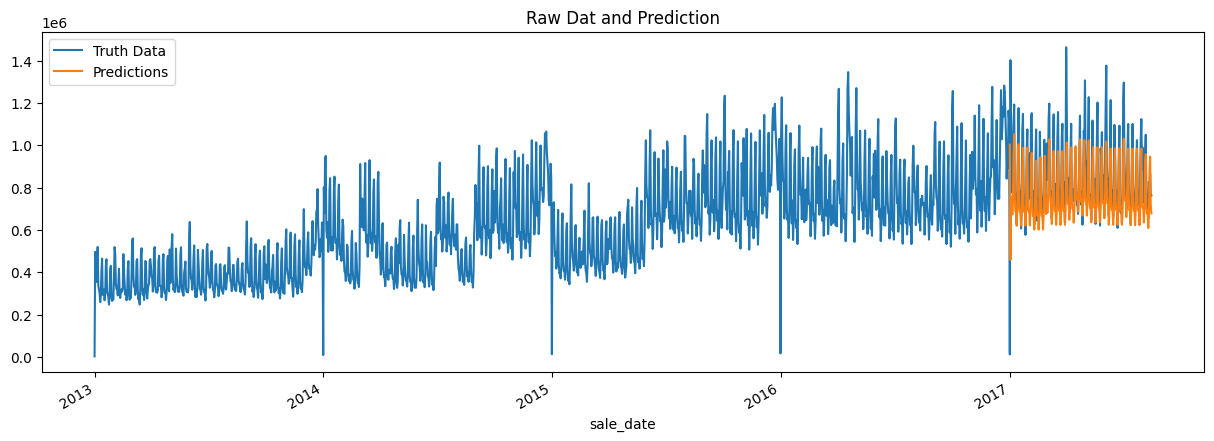

In [44]:
if 'prediction' in df.columns:
    df = df.drop(columns=['prediction'])

df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['total_sale']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

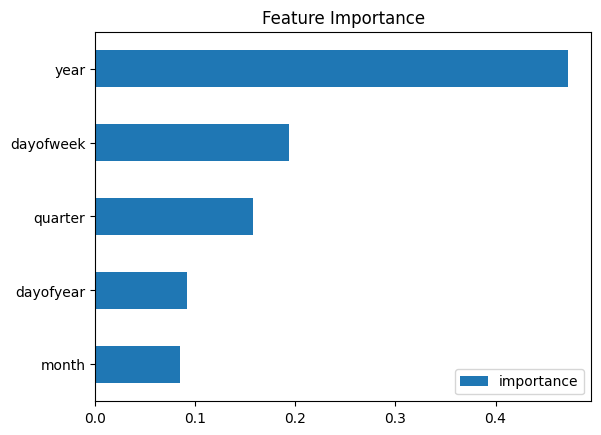

In [33]:
# Feature importance
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()